In [119]:
import pandas as pd
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
df = pd.read_csv('dataset_37_diabetes.csv')

df.head()

preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive

In [121]:
d = {'tested_negative': 0, 'tested_positive': 1, }

df['class'] = df['class'].map(d)

df.head()

preg  plas  pres  skin  insu  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

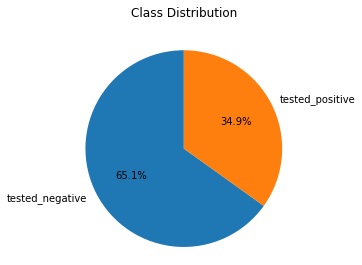

In [122]:
# Check  distribution of data
class_dist = df.groupby('class').size()
labels = 'tested_negative', 'tested_positive'
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=labels, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

In [123]:
data = df.values[:, 0:8]
labels = df.values[:, 8]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0, shuffle=True)
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [140]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       107
         1.0       0.79      0.57      0.67        47

    accuracy                           0.82       154
   macro avg       0.81      0.75      0.77       154
weighted avg       0.82      0.82      0.82       154

Test accuracy: 82.47%


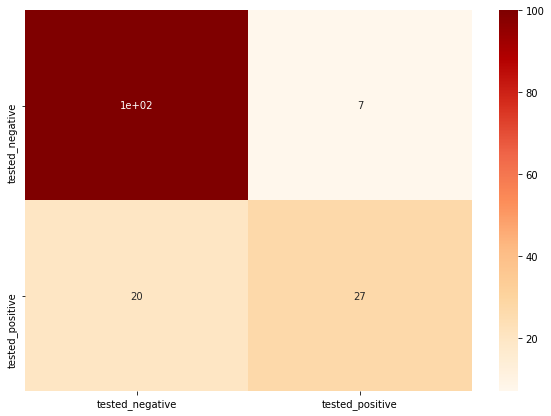

In [141]:
y_pred = classifier.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['tested_negative', 'tested_positive']],
              columns = [i for i in ['tested_negative', 'tested_positive']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (classifier.score(X_test, y_test)*100))